<a href="https://colab.research.google.com/github/piothi/EAN/blob/main/Encuentro%20Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Encuentro Final / Prueba extemporánea**


**ACTIVIDAD EXTEMPORÁNEA**

Los grupos deben entregar un documento HTML contenga lo siguiente:

1.    Instalación de los paquetes.

2.    Importe de las librerías necesarias.

3.    Carga de las bases de datos.

4.    Análisis exploratorio de las variables.

5.    Cruce de bases.

6.    Filtro de bases.

7.    Graficación de las variables.

8.    Análisis del sector económico.

Visualización de las variables y comentarios de lo observado.

**Datos de ventas online.**

***Orders.csv***
Order ID, Order Date, CustomerName, State, City.

***Details.csv***
Order ID Amountm, Profit, Quantity, Category, Sub-category, Payment.

Se realiza entrega dos bases de datos **Orders.csv** y **Details.csv** las cuales hacen referencia a datos de ventas online.

##**1. Instalación de paquetes**

In [49]:
pip install seaborn #Instalamos inicialmente mediante pip el paquete seaborn para visualización


In [50]:
pip install matplotlib #Instalamos inicialmente mediante pip el paquete matplotlib para visualización

In [51]:
pip install squarify #instalamos la biblioteca squarify

##**2. Importamos las librerías necesarias.**

In [52]:
# Procedemos a cargar los paquetes y las librerías necesarias para el análisis del conjunto de datos.

import pandas as pd #Importamos la librería para manipular los datos
import numpy as np #Trabajar con grandes conjuntos de datos
import os # Librería para manipular directorio del Sistema Operativo
import matplotlib.pyplot as plt #Libreria para Visualización
import seaborn as sns # Librería para hacer graficas.
import squarify # Importamos la librería encargada de crear el treemap

## **3. Cargas de las bases de datos.**

In [53]:
os.getcwd() # Obtengo el directorio actual del SO


'/content'

In [54]:
os.listdir('/content/drive/MyDrive/Colab Notebooks/Prueba_Extemporanea') # Listamos el Directorio donde se encuentra la información que vamos a trabajar


['Orders.csv', 'Details.csv']

##### **Primera Base de datos.**

In [55]:
df_Pedidos = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Prueba_Extemporanea/Orders.csv') # Cargamos nuestra primera base de datos Orders
df_Pedidos.head(7) # Analizamos los primeros 4 registros de la primera base.

,Order ID,Order Date,CustomerName,State,City
0,B-26055,10-03-2018,Harivansh,Uttar Pradesh,Mathura
1,B-25993,03-02-2018,Madhav,Delhi,Delhi
2,B-25973,24-01-2018,Madan Mohan,Uttar Pradesh,Mathura
3,B-25923,27-12-2018,Gopal,Maharashtra,Mumbai
4,B-25757,21-08-2018,Vishakha,Madhya Pradesh,Indore
5,B-25967,21-01-2018,Sudevi,Uttar Pradesh,Prayagraj
6,B-25955,16-01-2018,Shiva,Maharashtra,Pune


##### **Segunda Base de datos.**

In [56]:
df_Detalles = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Prueba_Extemporanea/Details.csv') # Cargamos nuestra primera base de datos Orders
df_Detalles.head(7) # Analizamos los primeros 7 registros de la Segunda base.

,Order ID,Amount,Profit,Quantity,Category,Sub-Category,PaymentMode
0,B-25681,1096,658,7,Electronics,Electronic Games,COD
1,B-26055,5729,64,14,Furniture,Chairs,EMI
2,B-25955,2927,146,8,Furniture,Bookcases,EMI
3,B-26093,2847,712,8,Electronics,Printers,Credit Card
4,B-25602,2617,1151,4,Electronics,Phones,Credit Card
5,B-25881,2244,247,4,Clothing,Trousers,Credit Card
6,B-25696,275,-275,4,Clothing,Saree,COD


## **4. Análisis exploratorio de las Variables.**

Resumen **estadísticos** de los dataframe **df_Pedidos** y **df_Detalles**

In [57]:
print(df_Pedidos.describe()) # Con el metodo describe podemos ver (Cantidad, valores unicos, top, frecuencia)

       Order ID  Order Date CustomerName        State    City
count       500         500          500          500     500
unique      500         307          336           19      25
top     B-26055  24-11-2018       Shreya  Maharashtra  Indore
freq          1           7            6           94      71


In [58]:
print(df_Detalles.describe()) # Con el metodo describe podemos ver (Cantidad, valores unicos, top, frecuencia)

            Amount      Profit     Quantity
count  1500.000000  1500.00000  1500.000000
mean    291.847333    24.64200     3.743333
std     461.924620   168.55881     2.184942
min       4.000000 -1981.00000     1.000000
25%      47.750000   -12.00000     2.000000
50%     122.000000     8.00000     3.000000
75%     326.250000    38.00000     5.000000
max    5729.000000  1864.00000    14.000000


**Valores Nulos.**

In [59]:
# No identificamos valores Nulos en la base de datos df_Pedidos

print("Valores Nulos Tabla pedidos:")
print(df_Pedidos.isnull().sum())

Valores Nulos Tabla pedidos:
Order ID        0
Order Date      0
CustomerName    0
State           0
City            0
dtype: int64


In [60]:
# No identificamos valores Nulos en la base de datos df_Detalles

print("Valores Nulos Tabla Detalle:")
print(df_Detalles.isnull().sum())

Valores Nulos Tabla Detalle:
Order ID        0
Amount          0
Profit          0
Quantity        0
Category        0
Sub-Category    0
PaymentMode     0
dtype: int64


###**Limpieza de variables.**

Modificamos el tipo de datos de la columna **Order Date** pasándola de **String** a **Date**

In [61]:
df_Pedidos['Order Date'] = pd.to_datetime(df_Pedidos['Order Date'],format='%d-%m-%Y')
df_Pedidos['Order Date']

,Order Date
0,2018-03-10
1,2018-02-03
2,2018-01-24
3,2018-12-27
4,2018-08-21
...,...
495,2018-08-03
496,2018-03-26
497,2018-07-01
498,2018-08-22


Modificamos el nombre de todas las columnas las cuales se encuentran de **Ingles** a **español** para un mejor entendimiento.

In [62]:
# Cambiamos el nombre de las columnas en el DataFrame de Pedidos

df_Pedidos = df_Pedidos.rename(columns={ # mediante el metodo rename procedemos a modificar el nombre de las columnas.
    'Order ID':'Pedido_ID',
    'Order Date':'Fecha_Pedido',
    'CustomerName':'Nombre_Cliente',
    'State':'Estado',
    'City':'Ciudad'
}
)

print(df_Pedidos.head(7)) # Visualizamos el DataFrame

  Pedido_ID Fecha_Pedido Nombre_Cliente          Estado     Ciudad
0   B-26055   2018-03-10      Harivansh   Uttar Pradesh    Mathura
1   B-25993   2018-02-03         Madhav           Delhi      Delhi
2   B-25973   2018-01-24    Madan Mohan   Uttar Pradesh    Mathura
3   B-25923   2018-12-27          Gopal     Maharashtra     Mumbai
4   B-25757   2018-08-21       Vishakha  Madhya Pradesh     Indore
5   B-25967   2018-01-21         Sudevi   Uttar Pradesh  Prayagraj
6   B-25955   2018-01-16          Shiva     Maharashtra       Pune


In [63]:
# Cambiamos el nombre de las columnas en el DataFrame de Detalle

df_Detalles = df_Detalles.rename(columns={ # mediante el metodo rename procedemos a modificar el nombre de las columnas.
    'Order ID': 'Pedido_ID',
    'Amount': 'Monto',
    'Profit': 'Ganancia',
    'Quantity': 'Cantidad',
    'Category': 'Categoria',
    'Sub-Category': 'Sub-categoria',
    'PaymentMode': 'Modo_de_Pago'
})

print(df_Detalles.head(6)) # Visualizamos el DataFrame

  Pedido_ID  Monto  Ganancia  Cantidad    Categoria     Sub-categoria  \
0   B-25681   1096       658         7  Electronics  Electronic Games   
1   B-26055   5729        64        14    Furniture            Chairs   
2   B-25955   2927       146         8    Furniture         Bookcases   
3   B-26093   2847       712         8  Electronics          Printers   
4   B-25602   2617      1151         4  Electronics            Phones   
5   B-25881   2244       247         4     Clothing          Trousers   

  Modo_de_Pago  
0          COD  
1          EMI  
2          EMI  
3  Credit Card  
4  Credit Card  
5  Credit Card  


In [64]:
# Modificamos la columna Modo_de_Pago de la tabla df_Detalles para entender un poco más los medios de pago.

# Creamos un diccionario con los valores que vamos a mapear para luego cambiarlos Modo_de_pagos y Categoria
Mpagos = {
    'EMI': 'Pagos Mensuales Iguales - EMI',
    'Credit Card': 'Tarjeta Credito - CC',
    'COD': 'Pago Contra Entrega - COD',
    'UPI': 'Interfaz Pago Unificada - UPI',
    'Debit Card': 'Tarjeta Debito - DC'
}

TCategoria = {
    'Electronics': 'Electronica',
    'Furniture': 'Muebles',
    'Clothing': 'Ropa'
}
df_Detalles['Modo_de_Pago'] = df_Detalles['Modo_de_Pago'].map(Mpagos)
df_Detalles['Categoria'] = df_Detalles['Categoria'].map(TCategoria)

df_Detalles[['Modo_de_Pago','Categoria']]

,Modo_de_Pago,Categoria
0,Pago Contra Entrega - COD,Electronica
1,Pagos Mensuales Iguales - EMI,Muebles
2,Pagos Mensuales Iguales - EMI,Muebles
3,Tarjeta Credito - CC,Electronica
4,Tarjeta Credito - CC,Electronica
...,...,...
1495,Pago Contra Entrega - COD,Ropa
1496,Pagos Mensuales Iguales - EMI,Ropa
1497,Pago Contra Entrega - COD,Electronica
1498,Pago Contra Entrega - COD,Ropa


In [65]:
df_Detalles['Modo_de_Pago'].unique() # Mostramos los Valores Unicos de la variable Modo_de_Pago para mostrar los valores Unicos

array(['Pago Contra Entrega - COD', 'Pagos Mensuales Iguales - EMI',
       'Tarjeta Credito - CC', 'Interfaz Pago Unificada - UPI',
       'Tarjeta Debito - DC'], dtype=object)

In [66]:
df_Detalles['Categoria'].unique()

array(['Electronica', 'Muebles', 'Ropa'], dtype=object)

## **5. Cruce de bases.**

In [67]:
# Mediante el metodo merge procedemos a combinar las dos tablas df_Pedidos y df_Detalles
df = pd.merge(df_Pedidos,df_Detalles,on='Pedido_ID', how='left') # Realizamos un left entre las dos tablas para no perder registors

df.info() # mostramos la esrucutra de la nueva tabla

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Pedido_ID       1500 non-null   object        
 1   Fecha_Pedido    1500 non-null   datetime64[ns]
 2   Nombre_Cliente  1500 non-null   object        
 3   Estado          1500 non-null   object        
 4   Ciudad          1500 non-null   object        
 5   Monto           1500 non-null   int64         
 6   Ganancia        1500 non-null   int64         
 7   Cantidad        1500 non-null   int64         
 8   Categoria       1500 non-null   object        
 9   Sub-categoria   1500 non-null   object        
 10  Modo_de_Pago    1500 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(7)
memory usage: 129.0+ KB


In [68]:
df # mostramos el DataFrame

,Pedido_ID,Fecha_Pedido,Nombre_Cliente,Estado,Ciudad,Monto,Ganancia,Cantidad,Categoria,Sub-categoria,Modo_de_Pago
0,B-26055,2018-03-10,Harivansh,Uttar Pradesh,Mathura,5729,64,14,Muebles,Chairs,Pagos Mensuales Iguales - EMI
1,B-26055,2018-03-10,Harivansh,Uttar Pradesh,Mathura,671,114,9,Electronica,Phones,Tarjeta Credito - CC
2,B-26055,2018-03-10,Harivansh,Uttar Pradesh,Mathura,443,11,1,Ropa,Saree,Pago Contra Entrega - COD
3,B-26055,2018-03-10,Harivansh,Uttar Pradesh,Mathura,57,7,2,Ropa,Shirt,Interfaz Pago Unificada - UPI
4,B-26055,2018-03-10,Harivansh,Uttar Pradesh,Mathura,227,48,5,Ropa,Stole,Pago Contra Entrega - COD
...,...,...,...,...,...,...,...,...,...,...,...
1495,B-25742,2018-08-03,Ashwin,Goa,Goa,11,-8,2,Ropa,Skirt,Interfaz Pago Unificada - UPI
1496,B-26088,2018-03-26,Bhavna,Sikkim,Gangtok,11,5,2,Ropa,Hankerchief,Interfaz Pago Unificada - UPI
1497,B-25707,2018-07-01,Shivani,Maharashtra,Mumbai,8,-6,1,Ropa,Stole,Pago Contra Entrega - COD
1498,B-25758,2018-08-22,Shubham,Himachal Pradesh,Simla,8,-2,1,Ropa,Stole,Pago Contra Entrega - COD


##**6. Filtro de bases**

In [69]:
df_filtro = df[df['Estado']=='Delhi'] # Filtramos los pedidos realizados en el estado de Delhi
df_filtro # Mostramos el DataFrame Filtrado.


,Pedido_ID,Fecha_Pedido,Nombre_Cliente,Estado,Ciudad,Monto,Ganancia,Cantidad,Categoria,Sub-categoria,Modo_de_Pago
9,B-25993,2018-02-03,Madhav,Delhi,Delhi,610,208,3,Electronica,Printers,Pago Contra Entrega - COD
10,B-25993,2018-02-03,Madhav,Delhi,Delhi,414,199,3,Electronica,Phones,Pago Contra Entrega - COD
11,B-25993,2018-02-03,Madhav,Delhi,Delhi,44,8,2,Ropa,Stole,Pago Contra Entrega - COD
12,B-25993,2018-02-03,Madhav,Delhi,Delhi,173,86,1,Electronica,Printers,Tarjeta Debito - DC
13,B-25993,2018-02-03,Madhav,Delhi,Delhi,221,26,7,Muebles,Furnishings,Pago Contra Entrega - COD
...,...,...,...,...,...,...,...,...,...,...,...
1343,B-25912,2018-12-16,Preksha,Delhi,Delhi,102,11,6,Ropa,T-shirt,Pago Contra Entrega - COD
1384,B-25988,2018-01-31,Nirja,Delhi,Delhi,79,-124,9,Ropa,Skirt,Pago Contra Entrega - COD
1385,B-25906,2018-12-11,Abhijit,Delhi,Delhi,78,27,3,Ropa,Stole,Pago Contra Entrega - COD
1398,B-25990,2018-02-02,Mugdha,Delhi,Delhi,71,32,3,Ropa,Saree,Tarjeta Debito - DC


In [70]:
df_fil = df[(df['Ciudad']=='Indore') & (df['Categoria']=='Ropa') & (df['Modo_de_Pago']=='Tarjeta Debito - DC')] # Filtramos los pedidos realizados en la ciudad Indore, Categoria ropa y pagaron con Tarjeta Debito
df_fil

,Pedido_ID,Fecha_Pedido,Nombre_Cliente,Estado,Ciudad,Monto,Ganancia,Cantidad,Categoria,Sub-categoria,Modo_de_Pago
25,B-25757,2018-08-21,Vishakha,Madhya Pradesh,Indore,17,-13,4,Ropa,Skirt,Tarjeta Debito - DC
26,B-25757,2018-08-21,Vishakha,Madhya Pradesh,Indore,46,14,5,Ropa,Skirt,Tarjeta Debito - DC
165,B-25681,2018-06-04,Bhawna,Madhya Pradesh,Indore,44,-3,1,Ropa,Saree,Tarjeta Debito - DC
203,B-26073,2018-03-21,Pournamasi,Madhya Pradesh,Indore,37,17,3,Ropa,Hankerchief,Tarjeta Debito - DC
224,B-25793,2018-09-24,Siddharth,Madhya Pradesh,Indore,60,-12,4,Ropa,Hankerchief,Tarjeta Debito - DC
225,B-25793,2018-09-24,Siddharth,Madhya Pradesh,Indore,257,-252,4,Ropa,Saree,Tarjeta Debito - DC
421,B-26061,2018-03-14,Anurag,Madhya Pradesh,Indore,27,8,2,Ropa,T-shirt,Tarjeta Debito - DC
440,B-25952,2018-01-13,Priyanka,Madhya Pradesh,Indore,352,18,5,Ropa,Trousers,Tarjeta Debito - DC
525,B-26100,2018-03-31,Hitika,Madhya Pradesh,Indore,34,10,2,Ropa,T-shirt,Tarjeta Debito - DC
623,B-25897,2018-12-06,Rohan,Madhya Pradesh,Indore,24,11,5,Ropa,Hankerchief,Tarjeta Debito - DC


In [71]:
df_cliente = df[df['Nombre_Cliente']=='Vishakha'] # Filtramos los pedidos realizados en la ciudad Indore, Categoria ropa y pagaron con Tarjeta Debito
df_cliente

,Pedido_ID,Fecha_Pedido,Nombre_Cliente,Estado,Ciudad,Monto,Ganancia,Cantidad,Categoria,Sub-categoria,Modo_de_Pago
25,B-25757,2018-08-21,Vishakha,Madhya Pradesh,Indore,17,-13,4,Ropa,Skirt,Tarjeta Debito - DC
26,B-25757,2018-08-21,Vishakha,Madhya Pradesh,Indore,46,14,5,Ropa,Skirt,Tarjeta Debito - DC
27,B-25757,2018-08-21,Vishakha,Madhya Pradesh,Indore,211,19,8,Ropa,Stole,Pago Contra Entrega - COD
28,B-25757,2018-08-21,Vishakha,Madhya Pradesh,Indore,165,30,3,Ropa,Stole,Pago Contra Entrega - COD
29,B-25757,2018-08-21,Vishakha,Madhya Pradesh,Indore,34,-11,5,Ropa,T-shirt,Pago Contra Entrega - COD
30,B-25757,2018-08-21,Vishakha,Madhya Pradesh,Indore,98,9,2,Muebles,Furnishings,Pago Contra Entrega - COD
31,B-25757,2018-08-21,Vishakha,Madhya Pradesh,Indore,106,15,7,Ropa,Hankerchief,Tarjeta Credito - CC
32,B-25757,2018-08-21,Vishakha,Madhya Pradesh,Indore,53,15,2,Ropa,Stole,Pago Contra Entrega - COD
33,B-25757,2018-08-21,Vishakha,Madhya Pradesh,Indore,14,5,1,Ropa,Hankerchief,Pago Contra Entrega - COD
34,B-25757,2018-08-21,Vishakha,Madhya Pradesh,Indore,17,7,3,Ropa,Hankerchief,Interfaz Pago Unificada - UPI


In [72]:
# Agrupamos por Ciudad el monto y la ganacias de cada una.

resultado = df.groupby('Ciudad').agg({
    'Monto': 'sum',
    'Ganancia': 'sum'
}).reset_index()

#Ordenar el resultado por 'Ganancia'
resultado_ordenado = resultado.sort_values(by='Ganancia', ascending=False).reset_index(drop=True)

resultado_ordenado

,Ciudad,Monto,Ganancia
0,Indore,63680,6763
1,Pune,43612,6160
2,Mathura,28747,3335
3,Chandigarh,21142,2778
4,Chennai,6276,2602
5,Thiruvananthapuram,13871,2435
6,Kolkata,14328,2074
7,Delhi,22957,1958
8,Ahmedabad,14543,1846
9,Patna,13417,1787


##**7. Graficación de las variables.**

####**Distribucción de pedidos por Ciudad**
Evidenciamos que la ciudad que más pedido realizo es Indore y la que menos pedido realizo es Prayagraj

In [73]:
df_pedidos_c = df.groupby('Ciudad').size().reset_index(name='Cantidad_Pedidos') # Procedemos asignar la cantidad de pedido solicitadas en las ciudades.
df_pedidos_ciudad = df_pedidos_c.sort_values('Cantidad_Pedidos',ascending=False) # Ordenamos por la Ciudad de Mayor pedido a menor

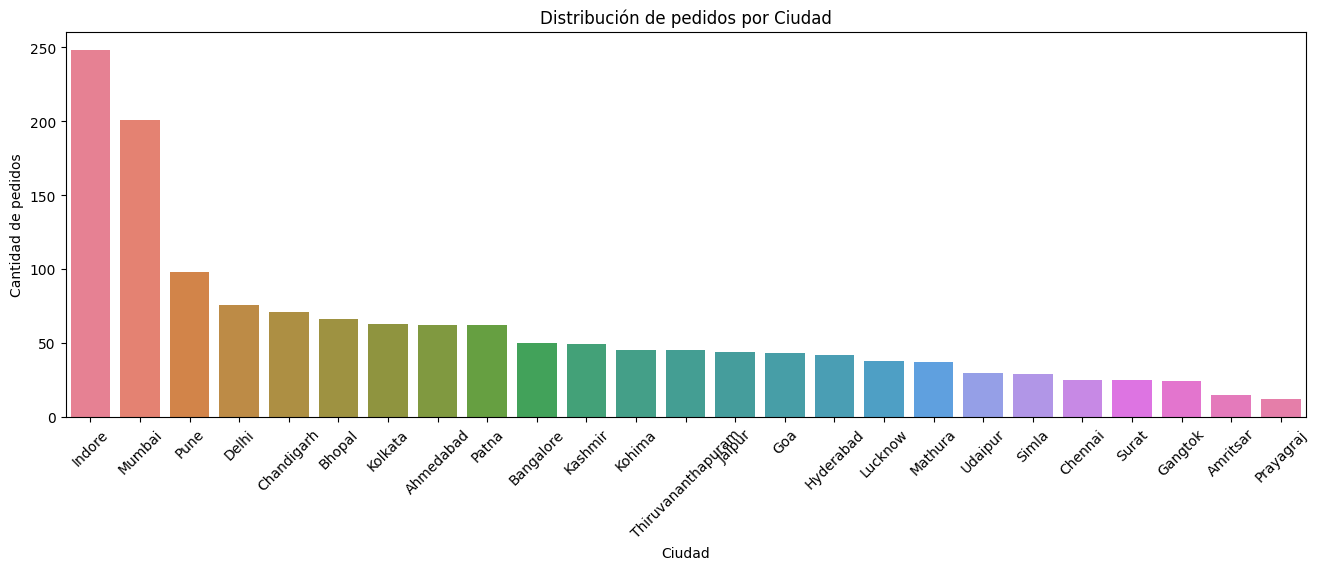

In [74]:
plt.figure(figsize=(16,5)) # Creamos el lienzo y le indicamos el tamaño en pixeles
plt.title('Distribución de pedidos por Ciudad')
plt.xticks(rotation=45) # Rotamos el nombre de las categorías eje X 45 grados
plt.xlabel('Ciudad')
plt.ylabel('Cantidad de pedidos')
sns.barplot(x='Ciudad', y='Cantidad_Pedidos', data=df_pedidos_ciudad, hue='Ciudad') # Utilizamos un grafico de barras y con hue divide los coloes por ciudad
plt.show() # muestra la grafica

In [75]:
ventas_ganancia_categoria = df.groupby('Categoria').agg({'Monto':'sum','Ganancia':'sum'}).reset_index()  # Agrupamos por Categoría y utilizamos agregación para sumar el Monto y ganancias
ventas_ganancia_categoria

,Categoria,Monto,Ganancia
0,Electronica,166267,13162
1,Muebles,127181,10476
2,Ropa,144323,13325


In [83]:
# Crear una columna 'Mes' que contenga el mes y el año
df['Mes'] = df['Fecha_Pedido'].dt.to_period('M')
ganancias_por_mes = df.groupby('Mes').agg({'Ganancia': 'sum'}).reset_index()
ganancias_por_mes

,Mes,Ganancia
0,2018-01,9684
1,2018-02,8465
2,2018-03,7793
3,2018-04,4192
4,2018-05,-3730
5,2018-06,420
6,2018-07,-2138
7,2018-08,2068
8,2018-09,-1399
9,2018-10,2959


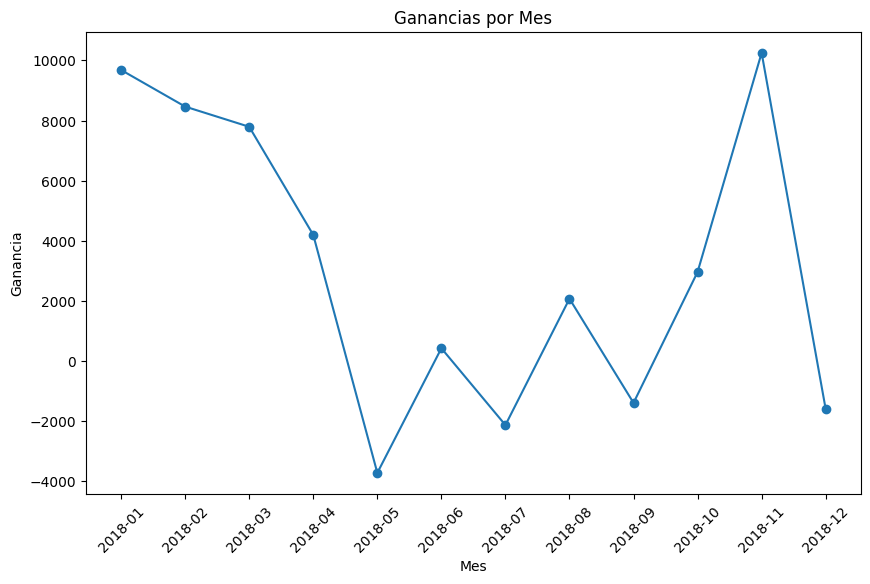

In [84]:
# Crear el gráfico de ganancias por mes
plt.figure(figsize=(10, 6))
plt.plot(ganancias_por_mes['Mes'].astype(str), ganancias_por_mes['Ganancia'], marker='o')

# Agregar títulos y etiquetas
plt.title('Ganancias por Mes')
plt.xlabel('Mes')
plt.ylabel('Ganancia')

# Rotar etiquetas del eje x para mejor legibilidad
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

In [76]:
df_vg= ventas_ganancia_categoria.melt(id_vars='Categoria', var_name='Tipo', value_name='Valor') #Volvemos en formato largo o Des pivoteamos la tabla de arriba

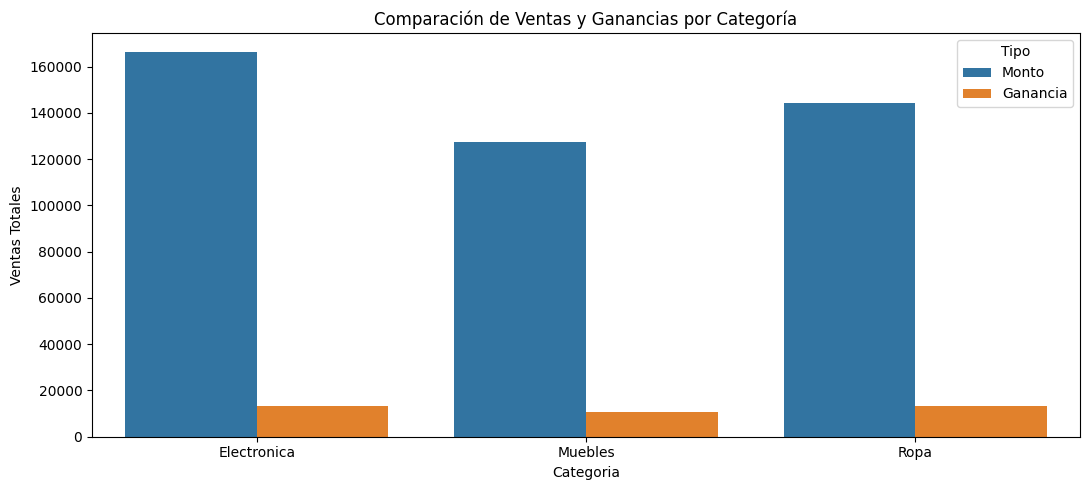

In [77]:
# Gráfico de ventas por categoría

plt.figure(figsize=(11,5)) # Creamos el lienzo y le indicamos el tamaño en pixeles
sns.barplot(x='Categoria', y='Valor', hue='Tipo', data=df_vg)
plt.title('Comparación de Ventas y Ganancias por Categoría')
plt.xlabel('Categoria')
plt.ylabel('Ventas Totales')
plt.tight_layout() #  ajusta automáticamente los márgenes y el espaciado de un gráfico

plt.show() # muestra la grafica

In [78]:
ventas_por_fecha = df.groupby('Fecha_Pedido').agg({'Monto': 'sum'}).reset_index() # Agrupamos por Fecha pedido y utilizamos agregación para sumar el Monto
ventas_por_fecha

,Fecha_Pedido,Monto
0,2018-01-01,147
1,2018-01-02,1678
2,2018-01-03,1397
3,2018-01-04,2918
4,2018-01-05,1948
...,...,...
302,2018-12-27,4836
303,2018-12-28,148
304,2018-12-29,1569
305,2018-12-30,57


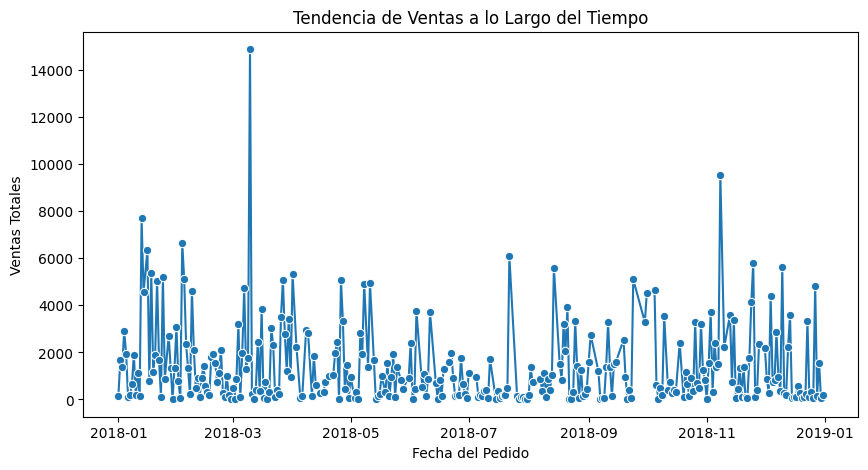

In [79]:
# Crear Tendencia de Ventas a lo Largo del Tiempo
plt.figure(figsize=(10, 5))
sns.lineplot(x= 'Fecha_Pedido', y= 'Monto', data= ventas_por_fecha, marker='o')
plt.title('Tendencia de Ventas a lo Largo del Tiempo')
plt.xlabel('Fecha del Pedido')
plt.ylabel('Ventas Totales')
plt.show()

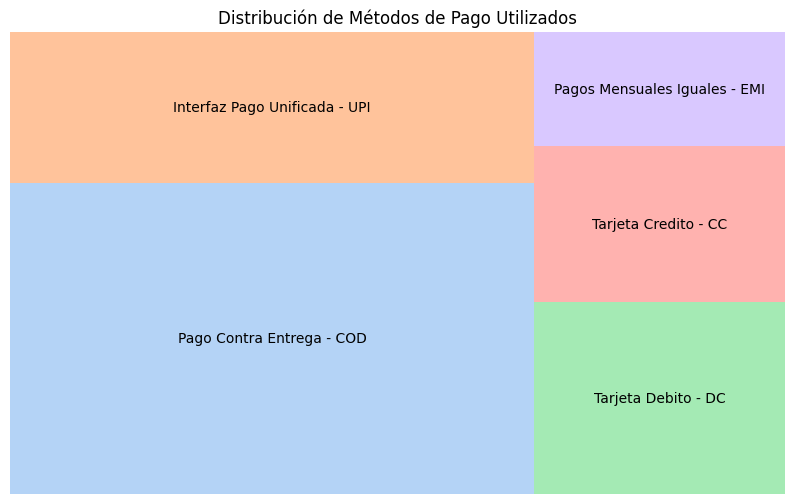

In [80]:
# Contar la cantidad de pedidos por método de pago
pedidos_por_pago = df['Modo_de_Pago'].value_counts().reset_index(name='Cantidad_Pedidos')

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
squarify.plot(sizes=pedidos_por_pago['Cantidad_Pedidos'],label= pedidos_por_pago['Modo_de_Pago'], color=sns.color_palette('pastel'), alpha=0.8)
plt.title('Distribución de Métodos de Pago Utilizados')
plt.axis('off')  # Ocultar los ejes
plt.show()


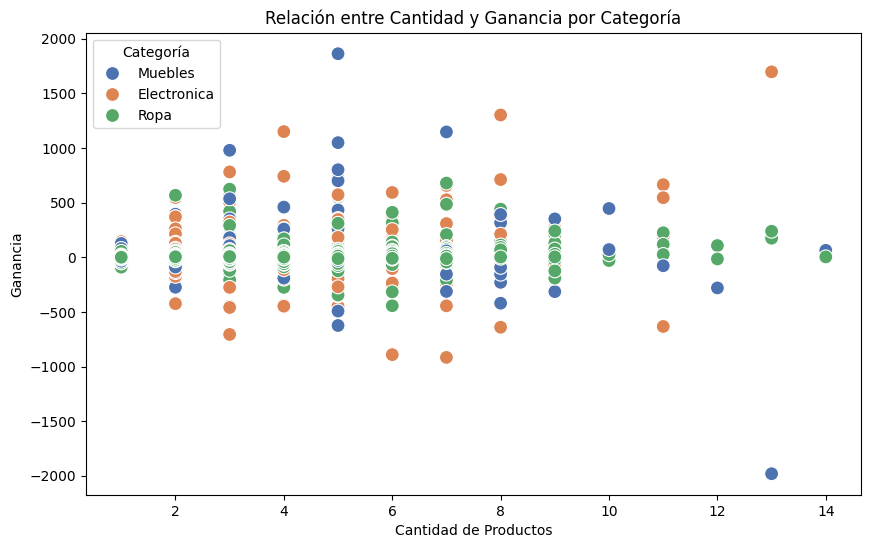

In [81]:
# Crear un scatter plot de Cantidad vs Ganancia
plt.figure(figsize=(10, 6))

sns.scatterplot(x='Cantidad', y='Ganancia', data=df, hue='Categoria', palette='deep', s=100)
plt.title('Relación entre Cantidad y Ganancia por Categoría')
plt.xlabel('Cantidad de Productos')
plt.ylabel('Ganancia')
plt.legend(title='Categoría')
plt.show()

##**8. Análisis del sector.**

** **
Respecto a la grafica de barras agrupadas **Comparación de Ventas y Ganancias
por Categoría**

* Electrónica: Tiene la mayor cantidad de ventas, pero las ganancias son relativamente bajas en comparación con las ventas totales.

* Muebles: Las ventas son moderadas, y las ganancias también son proporcionales.

* Ropa: Aunque las ventas son más bajas que en las otras categorías, las ganancias son relativamente altas en comparación con las ventas.


** **
Respecto a la grafica de barras **Distribución de pedidos por Ciudad**


Evidenciamos que la ciudad con mayor cantidad de pedidos es Indore seguida de Mumbai, mientras que las que menos pedidos realizan son prayagraj y amristar.

** **
Respecto a la grafica treemap **Distribución de Métodos de Pago Utilizados**


Podemos inferir que el pago mas utilizado en la india es la Interfaz Pago Unificada (UPI) en azul, seguido por el Pago Contra Entrega (COD) en naranja, luego el Pagos Mensuales Iguales (EMI) en rosa y por ultimo Tarjeta de Crédito (CC) y Tarjeta de Débito (DC) en verde.

** **
Respecto a la grafica de dispersion **Relacióna entre Cantidad y Ganancia por Categoría**


**1. Distribución de la ganancia por Categorias:** Las ganancias varian considerablemente para diferentes cantidades de productos vendidos. Sugiere que no hay una relacion directa entre la cantidad de productos vendidos y la ganancia obtenida.


**2. Categorias:**

* Muebles (azul) parece mostrar mayor variablidad en las ganancias. algunos puntos para esta categoria muestran ganancias negativas,  lo que indica que en algunos casos, las ventas de muebles podrían haber resultado en pérdidas.

* Electrónica (naranja) tiene mayor concentracion de puntos en el rango de ganancias positivas, podria sugerir que esta categoria es mas rentable.

* Ropa  (verde) muestra una distribución bastante amplia, con varias ventas que resultan en pequeñas ganancias o incluso en pérdidas.

** **